In [20]:
import pandas as pd
import sklearn
import category_encoders as CE

In [21]:
data = pd.read_csv("sampling_healtkathon2022\sampling_healtkathon2022.csv")
data.head(5)

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
0,165666,486,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,...,184300.0,1.0,Q-5-42-0,3,None,None,None,None,None,0
1,1010828,520,17,A,63,L,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,...,10628400.0,1.0,D-4-13-III,1,None,None,None,None,None,0
2,166042,523,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,...,187300.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
3,168937,549,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,...,187300.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
4,1005899,549,17,A,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,...,381600.0,1.0,Q-5-44-0,3,None,None,None,None,None,0


In [22]:
# remove id columns
X, y = data.iloc[:,2:-6], data.iloc[:, -1]
X, y

(          dati2 typefaskes  usia jenkel  pisat                 tgldatang  \
 0            17         KL    48      P    1.0  2018-07-25T17:00:00.000Z   
 1            17          A    63      L    1.0  2019-05-27T17:00:00.000Z   
 2            17         KL    53      P    1.0  2019-07-16T17:00:00.000Z   
 3            17         KL    54      P    1.0  2019-10-17T17:00:00.000Z   
 4            17          A    53      P    1.0  2018-04-18T17:00:00.000Z   
 ...         ...        ...   ...    ...    ...                       ...   
 11401877    301          B     0      P    4.0  2020-12-30T17:00:00.000Z   
 11401878    233          A     0      P    4.0  2020-12-30T17:00:00.000Z   
 11401879    118          B     0      L    4.0  2020-12-30T17:00:00.000Z   
 11401880    101         SC     0      L    5.0  2020-12-29T17:00:00.000Z   
 11401881     12         SD     0      P    4.0  2020-12-29T17:00:00.000Z   
 
                          tglpulang  jenispel politujuan diagfktp       bi

In [23]:
print(X.isnull().sum())
X.drop(columns=["politujuan", "diagfktp", "cbg"], inplace=True)

dati2                0
typefaskes           0
usia                 0
jenkel              49
pisat              190
tgldatang            0
tglpulang            0
jenispel             0
politujuan     4041455
diagfktp          2530
biaya            57815
jenispulang         39
cbg                  0
kelasrawat           0
dtype: int64


In [24]:
X.typefaskes.unique()

array(['KL', 'A', 'SD', 'KI', 'C', 'B', 'I2', 'SC', 'SB', 'KJ', 'I3',
       'KM', 'I4', 'HD', 'KU', 'GD', 'KO', 'KP', 'D', 'KB', 'KG', 'I1',
       'KT', 'KC', 'SA', 'KK'], dtype=object)

In [25]:
BE = CE.BinaryEncoder(cols=["typefaskes"])
X = BE.fit_transform(X)
X

,dati2,typefaskes_0,typefaskes_1,typefaskes_2,typefaskes_3,typefaskes_4,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,biaya,jenispulang,kelasrawat
0,17,0,0,0,0,1,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,184300.0,1.0,3
1,17,0,0,0,1,0,63,L,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,10628400.0,1.0,1
2,17,0,0,0,0,1,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,187300.0,1.0,3
3,17,0,0,0,0,1,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,187300.0,1.0,3
4,17,0,0,0,1,0,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,381600.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11401877,301,0,0,1,1,0,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,3645100.0,1.0,3
11401878,233,0,0,0,1,0,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,12273200.0,1.0,2
11401879,118,0,0,1,1,0,0,L,4.0,2020-12-30T17:00:00.000Z,2021-01-06T17:00:00.000Z,1,4099000.0,1.0,3
11401880,101,0,1,0,0,0,0,L,5.0,2020-12-29T17:00:00.000Z,2020-12-31T17:00:00.000Z,1,3992400.0,1.0,3


In [26]:
from sklearn.impute import SimpleImputer

imp_mode = SimpleImputer(strategy='most_frequent')
X.jenkel = imp_mode.fit_transform(X[["jenkel"]])
X.pisat = imp_mode.fit_transform(X[["pisat"]])
X.jenispulang = imp_mode.fit_transform(X[["jenispulang"]])

imp_mean = SimpleImputer(strategy='mean')
X.biaya = imp_mode.fit_transform(X[["biaya"]])

oe = CE.OneHotEncoder(cols=["jenkel", "jenispulang"])
X = oe.fit_transform(X)
X.drop(columns=["jenkel_2"], inplace=True)
X.rename(columns={"jenkel_1":"jenkel"}, inplace=True)
X

,dati2,typefaskes_0,typefaskes_1,typefaskes_2,typefaskes_3,typefaskes_4,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,biaya,jenispulang_1,jenispulang_2,jenispulang_3,jenispulang_4,jenispulang_5,kelasrawat
0,17,0,0,0,0,1,48,1,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,184300.0,1,0,0,0,0,3
1,17,0,0,0,1,0,63,0,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,10628400.0,1,0,0,0,0,1
2,17,0,0,0,0,1,53,1,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,187300.0,1,0,0,0,0,3
3,17,0,0,0,0,1,54,1,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,187300.0,1,0,0,0,0,3
4,17,0,0,0,1,0,53,1,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,381600.0,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11401877,301,0,0,1,1,0,0,1,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,3645100.0,1,0,0,0,0,3
11401878,233,0,0,0,1,0,0,1,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,12273200.0,1,0,0,0,0,2
11401879,118,0,0,1,1,0,0,0,4.0,2020-12-30T17:00:00.000Z,2021-01-06T17:00:00.000Z,1,4099000.0,1,0,0,0,0,3
11401880,101,0,1,0,0,0,0,0,5.0,2020-12-29T17:00:00.000Z,2020-12-31T17:00:00.000Z,1,3992400.0,1,0,0,0,0,3


In [27]:
uniq_category = [X.iloc[:, i].unique() for i in range(X.shape[1])]
uniq_category = pd.DataFrame({"kolom":X.columns,"unique":uniq_category,"count":list(map(len,uniq_category))})
uniq_category

,kolom,unique,count
0,dati2,"[17, 8, 19, 13, 12, 9, 457, 113, 117, 133, 1, ...",489
1,typefaskes_0,"[0, 1]",2
2,typefaskes_1,"[0, 1]",2
3,typefaskes_2,"[0, 1]",2
4,typefaskes_3,"[0, 1]",2
5,typefaskes_4,"[1, 0]",2
6,usia,"[48, 63, 53, 54, 50, 49, 46, 61, 59, 60, 47, 5...",111
7,jenkel,"[1, 0]",2
8,pisat,"[1.0, 2.0, 4.0, 3.0, 5.0]",5
9,tgldatang,"[2018-07-25T17:00:00.000Z, 2019-05-27T17:00:00...",1096


In [28]:
for i in [1,2,3,4,5,6,7,8,11,13,14,15,16,17,18]:
    X.iloc[:, i] = X.iloc[:, i].astype('int8')
X.dtypes

dati2              int64
typefaskes_0        int8
typefaskes_1        int8
typefaskes_2        int8
typefaskes_3        int8
typefaskes_4        int8
usia                int8
jenkel              int8
pisat               int8
tgldatang         object
tglpulang         object
jenispel            int8
biaya            float64
jenispulang_1       int8
jenispulang_2       int8
jenispulang_3       int8
jenispulang_4       int8
jenispulang_5       int8
kelasrawat          int8
dtype: object

In [29]:
X["tgldatang"] = int(pd.to_datetime(X['tglpulang']) - pd.to_datetime(X['tgldatang'])) / 10**9
X.drop(columns=["tglpulang"], inplace=True)
X["tgldatang"]

TypeError: cannot convert the series to <class 'int'>

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
X_train.shape

(8551411, 18)

In [18]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, y_train = os.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape)

TypeError: float() argument must be a string or a number, not 'Timedelta'

In [ ]:
%%time
table_logistic = []

x1_train,y1_train = train1.iloc[:,:-1],train1.iloc[:,-1]
pipe1 = make_pipeline(StandardScaler(), LogisticRegression())
pipe1.fit(x1_train,y1_train)

In [ ]:
from sklearn import svm

clf1 = svm.SVC()
clf1.fit(X_train, y_train)
clf1.predict(X_test)

In [32]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [27]:
confusion_matrix(y_test,y_hat_DC)

array([[2677585,  133664],
       [  17044,   22178]])

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate(tn,fp,fn,tp):
    sensitivity = tp/(tp+fn)
    precision = (tp/(tp+fp))
    neg_pred_val = (tn/(tn+fn))
    specificity = (tn/(tn+fp))
    accuracy = ((tp+tn)/(tp+tn+fp+fn))
    return sensitivity,precision,neg_pred_val,specificity,accuracy

y_hat_DC = clf.predict(X_test)
evaluate(*confusion_matrix(y_test,y_hat_DC).ravel())

(0.5654479628779766,
 0.14231080196609386,
 0.9936748249944612,
 0.9524538737052464,
 0.9471287376717742)

In [ ]:
from sklbearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate(tn,fp,fn,tp):
    sensitivity = tp/(tp+fn)
    precision = (tp/(tp+fp))
    neg_pred_val = (tn/(tn+fn))
    specificity = (tn/(tn+fp))
    accuracy = ((tp+tn)/(tp+tn+fp+fn))
    return sensitivity,precision,neg_pred_val,specificity,accuracy

y_hat_DC = clf.predict(X_test)
evaluate(*confusion_matrix(y_test,y_hat_DC).ravel())

In [31]:
X_train

,dati2,typefaskes_0,typefaskes_1,typefaskes_2,typefaskes_3,typefaskes_4,usia,jenkel,pisat,tgldatang,jenispel,biaya,jenispulang_1,jenispulang_2,jenispulang_3,jenispulang_4,jenispulang_5,kelasrawat
0,204,0,1,0,0,1,0,1,1,172800.0,1,5483600.0,1,0,0,0,0,3
1,511,0,1,0,0,0,17,1,4,172800.0,1,3985400.0,1,0,0,0,0,3
2,201,0,0,1,0,1,27,1,4,1728000.0,1,2922900.0,1,0,0,0,0,3
3,128,0,0,1,0,1,0,0,4,172800.0,1,3326400.0,1,0,0,0,0,3
4,217,0,1,0,1,1,0,0,4,259200.0,1,1786900.0,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16867483,309,0,1,1,0,0,49,0,1,0.0,2,213100.0,1,0,0,0,0,3
16867484,129,0,0,1,0,1,38,0,4,0.0,2,225100.0,1,0,0,0,0,3
16867485,132,0,1,0,0,0,48,0,1,0.0,2,190400.0,1,0,0,0,0,3
16867486,206,0,0,1,1,0,45,0,1,0.0,2,190400.0,1,0,0,0,0,3


<AxesSubplot:ylabel='Frequency'>

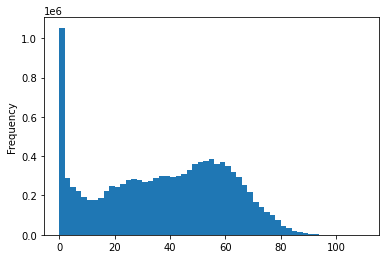

In [ ]:
data1["usia"].plot.hist(bins=55)

In [ ]:
data1["usia"].max()

110

In [ ]:
data1[data1["usia"]==0].loc[:,["typefaskes","jenispel","politujuan","jenispulang","kelasrawat","label"]].head(20)

,typefaskes,jenispel,politujuan,jenispulang,kelasrawat,label
83516,SB,1,NaN,1.0,1,0
87479,C,2,IGD,1.0,3,0
87497,SC,2,IGD,1.0,3,0
87535,SB,2,IRM,1.0,3,0
87536,SC,2,ANA,1.0,3,0
88377,B,2,IGD,1.0,3,0
89673,SC,1,NaN,1.0,1,0
89688,B,2,KLT,1.0,3,0
89892,SD,1,NaN,1.0,3,0
90033,SC,2,IGD,1.0,3,0


In [ ]:
data1["id_peserta"].unique().shape

(8527919,)

In [ ]:
diag = pd.read_csv("sampling_healthkathon2022_diagnosa/sampling_healthkathon2022_diagnosa.csv")
diag

,id,diag,levelid
0,6,O06.9,1
1,57,J02.9,1
2,91,R10.1,1
3,109,R18,1
4,111,N81.3,1
...,...,...,...
17308531,11426947,K30,2
17308532,11426947,E78.0,2
17308533,11426947,I21.9,1
17308534,11426952,K30,1


In [ ]:
len(diag["id"].unique())

11403151

In [ ]:
diag[diag["diag"]=="E78.0"]

,id,diag,levelid
2999,28809,E78.0,2
3107,29985,E78.0,2
3178,30787,E78.0,2
3218,31205,E78.0,2
3501,33672,E78.0,2
...,...,...,...
17306229,11406491,E78.0,2
17306277,11406815,E78.0,2
17308010,11422350,E78.0,2
17308160,11423639,E78.0,2


In [ ]:
procedure = pd.read_csv("sampling_healthkathon2022_procedure/sampling_healthkathon2022_procedure.csv")
procedure.head(5)

,id,proc
0,6,90.59
1,6,69.01
2,6,88.78
3,27,90.59
4,27,88.78


In [ ]:
procedure.shape

(12202871, 2)

In [ ]:
len(procedure["id"].unique())

6454758

In [ ]:
data1[data1["id_peserta"]==6]

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
1819543,1050016,6,17,B,63,P,3.0,2020-02-10T17:00:00.000Z,2020-02-10T17:00:00.000Z,2,...,185500.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
1819544,1057675,6,17,B,62,P,3.0,2019-10-20T17:00:00.000Z,2019-10-20T17:00:00.000Z,2,...,186800.0,1.0,Q-5-42-0,3,None,None,None,None,None,0
1819545,1057536,6,17,B,62,P,3.0,2019-10-14T17:00:00.000Z,2019-10-14T17:00:00.000Z,2,...,149900.0,1.0,Q-5-27-0,3,None,None,None,None,None,0
1819546,1049925,6,17,B,63,P,3.0,2020-02-03T17:00:00.000Z,2020-02-03T17:00:00.000Z,2,...,168600.0,1.0,Z-3-13-0,3,None,None,None,None,None,0
1819547,1056197,6,17,B,62,P,3.0,2019-09-09T17:00:00.000Z,2019-09-09T17:00:00.000Z,2,...,185500.0,1.0,Q-5-44-0,3,None,None,None,None,None,0


In [ ]:
diag[diag["id"]==6]

,id,diag,levelid
0,6,O06.9,1


In [ ]:
procedure[procedure["id"]==6]

,id,proc
0,6,90.59
1,6,69.01
2,6,88.78


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [ ]:
data1

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
0,165666,486,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,...,184300.0,1.0,Q-5-42-0,3,None,None,None,None,None,0
1,1010828,520,17,A,63,L,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,...,10628400.0,1.0,D-4-13-III,1,None,None,None,None,None,0
2,166042,523,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,...,187300.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
3,168937,549,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,...,187300.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
4,1005899,549,17,A,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,...,381600.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11401877,9983563,8527704,301,B,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,...,3645100.0,1.0,P-8-17-I,3,None,None,None,None,None,0
11401878,11053870,8527709,233,A,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,...,12273200.0,1.0,P-8-13-II,2,None,None,None,None,None,0
11401879,7461049,8527751,118,B,0,L,4.0,2020-12-30T17:00:00.000Z,2021-01-06T17:00:00.000Z,1,...,4099000.0,1.0,P-8-08-I,3,None,None,None,None,None,0
11401880,1075162,8527853,101,SC,0,L,5.0,2020-12-29T17:00:00.000Z,2020-12-31T17:00:00.000Z,1,...,3992400.0,1.0,P-8-08-I,3,None,None,None,None,None,0


In [ ]:
data1.drop(columns=['id','id_peserta','tgldatang','tglpulang','politujuan','diagfktp','typefaskes','jenkel','cbg','kdsa','kdsp','kdsr','kdsi','kdsd'],inplace=True)

In [ ]:
data1.dropna(inplace=True)

In [ ]:
%%time
train1, test1 = train_test_split(data1, test_size=0.2,random_state=1)

CPU times: total: 2.42 s

Wall time: 2.43 s


In [ ]:
x1_train.dtypes

dati2            int64
usia             int64
pisat          float64
jenispel         int64
biaya          float64
jenispulang    float64
kelasrawat       int64
dtype: object

In [ ]:
%%time
table_logistic = []

x1_train,y1_train = train1.iloc[:,:-1],train1.iloc[:,-1]
pipe1 = make_pipeline(StandardScaler(), LogisticRegression())
pipe1.fit(x1_train,y1_train)

CPU times: total: 24.6 s

Wall time: 8.63 s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
def calculate_oil(tn,fp,fn,tp):
    sensitivity = tp/(tp+fn)
    precision = (tp/(tp+fp))
    neg_pred_val = (tn/(tn+fn))
    specificity = (tn/(tn+fp))
    accuracy = ((tp+tn)/(tp+tn+fp+fn))
    return sensitivity,precision,neg_pred_val,specificity,accuracy

In [ ]:
%%time
x1_test = test1.iloc[:,:-1]
y1_test = test1.iloc[:,-1]
y1_pred = pipe1.predict(x1_test)
tn,fp,fn,tp = metrics.confusion_matrix(y1_test, y1_pred).ravel()
table_logistic.append(calculate_oil(tn,fp,fn,tp))

CPU times: total: 688 ms

Wall time: 468 ms


C:\Users\jmspa\AppData\Local\Temp\ipykernel_28044\2822190110.py:3: RuntimeWarning: invalid value encountered in longlong_scalars

  precision = (tp/(tp+fp))


In [ ]:
metrics.confusion_matrix(y1_test, y1_pred)

array([[2248636,       0],
       [  20132,       0]], dtype=int64)

In [ ]:
set(y1_pred)

{0}

In [ ]:
table_logistic

[(0.0, nan, 0.9911264615862001, 1.0, 0.9911264615862001)]

In [ ]:
%%time

print("halo")

halo

Wall time: 0 ns
